#### 부스트(boost) 방법은 미리 정해진 갯수의 모형 집합을 사용하는 것이 아니라 하나의 모형에서 시작하여 모형 집합에 포함할 개별 모형을 하나씩 추가한다. 

모형의 집합은 위원회(commitee)  𝐶 라고 하고  𝑚 개의 모형을 포함하는 위원회를  𝐶𝑚 으로 표시한다. 

위원회에 들어가는 개별 모형을 약 분류기(weak classifier)라고 하며  𝑘 로 표시한다.

#### 부스트 방법의 특징은 한번에 하나씩 모형을 추가한다는 것이다.

$$C_1 = \{ k_1 \}$$

$$C_2 = C_1 \cup k_2 = \{ k_1, k_2 \}$$

$$C_3 = C_2 \cup k_3 = \{ k_1, k_2, k_3 \}$$

$$\vdots$$

$$C_m = C_{m-1} \cup k_m = \{ k_1, k_2, \ldots, k_m \}$$

그리고  𝑚 번째로 위원회에 추가할 개별 모형  𝑘𝑚 의 선택 기준은 그 전단계의 위원회  𝐶𝑚−1 의 성능을 보완하는 것이다.

#### 위원회  𝐶𝑚 의 최종 결정은 다수결 방법을 사용하지 않고 각각의 개별 모형의 출력을 가중치  𝛼 로 가중선형조합한 값을 판별 함수로 사용한다. 

#### 또한 부스트 방법은 이진 분류에만 사용할 수 있으며  𝑦 값은 1또는 -1의 값을 가진다.

$$y = -1 \text{ or } 1$$

$$C_{m}(x_i) =  \text{sign} \left( \alpha_1k_1(x_i) + \cdots + \alpha_{m}k_{m}(x_i) \right)$$

## 에이다부스트

에이다부스트(adaboost)라는 이름은 적응 부스트(adaptive boost)라는 용어에서 나왔다. 에이다부스트는 위원회에 넣을 개별 모형  𝑘𝑚 을 선별하는 방법으로는 학습 데이터 집합의  𝑖 번째 데이터에 가중치  𝑤𝑖 를 주고 분류 모형이 틀리게 예측한 데이터의 가중치를 합한 값을 손실함수  𝐿 로 사용한다. 이 손실함수를 최소화하는 모형이  𝑘𝑚 으로 선택된다.

$$L_m = \sum_{i=1}^N w_{m,i} I\left(k_m(x_i) \neq y_i\right)$$

#### 위 식에서  𝐼 는  𝑘(𝑥𝑖)≠𝑦𝑖 라는 조건이 만족되면 1, 아니면 0을 가지는 지시함수(indicator function)이다. 따라서 틀린 문제에 대한 가중치의 합이다.

위원회  𝐶𝑚 에 포함될 개별 모형  𝑘𝑚 이 선택된 후에는 가중치  𝛼𝑚 를 결정해야 한다. 이 값은 다음처럼 계산한다.

$$\epsilon_m = \dfrac{\sum_{i=1}^N w_{m,i} I\left(k_m(x_i) \neq y_i\right)}{\sum_{i=1}^N w_{m,i}}$$

$$\alpha_m = \frac{1}{2}\log\left( \frac{1 - \epsilon_m}{\epsilon_m}\right)$$

데이터에 대한 가중치  𝑤𝑚,𝑖 는 최초에는(m=1)모든 데이터에 대해 같은 값을 가지지만 위원회가 증가하면서 값이 바뀐다. 가중치의 값은 지수함수를 사용하여 위원회  𝐶𝑚−1 이 맞춘 문제는 작게, 틀린 문제는 크게 확대(boosting)된다.

$$w_{m,i} = w_{m-1,i}  \exp (-y_iC_{m-1}) = 
\begin{cases}
w_{m-1,i}e^{-1}  & \text{ if } C_{m-1} = y_i\\
w_{m-1,i}e & \text{ if } C_{m-1} \neq y_i 
\end{cases}$$

#### 𝑚 번째 멤버의 모든 후보에 대해 위 손실 함수를 적용하여 가장 값이 작은 후보를  𝑚 번째 멤버로 선정한다.

에이다부스팅은 사실 다음과 같은 손실함수를 최소화하는  𝐶𝑚 을 찾아가는 방법이라는 것을 증명할 수 있다.

$$L_m = \sum_{i=1}^N \exp(−y_i C_m(x_i))$$

개별 멤버  𝑘𝑚 과 위원회의 관계는

$$C_m(x_i) = \sum_{j=1}^m \alpha_j k_j(x_i) = C_{m-1}(x_i) + \alpha_m k_m(x_i)$$

이고 이 식을 대입하면

\begin{eqnarray}
L_m 
&=& \sum_{i=1}^N \exp(−y_i C_m(x_i)) \\
&=& \sum_{i=1}^N \exp\left(−y_iC_{m-1}(x_i) - \alpha_m y_i k_m(x_i) \right) \\
&=& \sum_{i=1}^N \exp(−y_iC_{m-1}(x_i)) \exp\left(-\alpha_m y_i k_m(x_i)\right) \\
&=& \sum_{i=1}^N w_{m,i} \exp\left(-\alpha_m y_i k_m(x_i)\right) \\
\end{eqnarray}

𝑦𝑖 와  𝑘𝑀(𝑥𝑖) 가 1 또는 -1값만 가질 수 있다는 점을 이용하면,

\begin{eqnarray}
L_m 
&=& 
e^{-\alpha_m}\sum_{k_m(x_i) = y_i} w_{m,i} + e^{\alpha_m}\sum_{k_m(x_i) \neq y_i} w_{m,i} \\
&=& 
\left(e^{\alpha_m}-e^{-\alpha_m}\right) \sum_{i=1}^N w_{m,i} I\left(k_m(x_i) \neq y_i\right) + 
e^{-\alpha_m}\sum_{i=1}^N w_{m,i}
\end{eqnarray}

𝐿𝑚 을 최소화하려면  ∑𝑁𝑖=1𝑤𝑚,𝑖𝐼(𝑘𝑚(𝑥𝑖)≠𝑦𝑖) 을 최소화하는  𝑘𝑚  함수를 찾은 다음  𝐿𝑚 을 최소화하는  𝛼𝑚 을 찾아야 한다.

$$\dfrac{d L_m}{d \alpha_m} = 0$$

이 조건으로부터  𝛼𝑚  공식을 유도할 수 있다.

다음은 scikit-learn의 ensemble 서브패키지가 제공하는 AdaBoostClassifier 클래스를 사용하여 분류 예측을 하는 예이다. 약분류기로는 깊이가 1인 단순한 의사결정나무를 채택하였다.

여기에서는 각 표본 데이터의 가중치 값을 알아보기 위해 기존의 AdaBoostClassifier 클래스를 서브클래싱하여 가중치를 속성으로 저장하도록 수정한 모형을 사용하였다.

In [4]:
import warnings
warnings.filterwarnings(action='ignore')

import matplotlib.pylab as plt
import matplotlib as mpl
import matplotlib.font_manager as fm
import seaborn as sns
import numpy as np

sns.set_style("whitegrid")
mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.size'] = 15

path = "/Library/Fonts/NanumGothic.otf"
font_name = fm.FontProperties(fname=path, size=20).get_name()

plt.rc('font', family=font_name)

In [5]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_gaussian_quantiles
from sklearn.tree import DecisionTreeClassifier

In [6]:
X1, y1 = make_gaussian_quantiles(cov=2., n_samples=100, n_features=2, n_classes=2, random_state=1)
X2, y2 = make_gaussian_quantiles(mean=(3, 3), cov=1.5, n_samples=200, n_features=2, n_classes=2, random_state=1)

X = np.concatenate((X1, X2))
y = np.concatenate((y1, -y2 + 1))

In [8]:
class MyAdaBoostClassifier(AdaBoostClassifier):
    def __init__(self, 
                 base_estimator=None, 
                 n_estimators=50, 
                 algorithm='SAMME.R', 
                 learning_rate=1, 
                 random_state=None):
        
        super(MyAdaBoostClassifier, self).__init__(
            base_estimator=base_estimator, 
            n_estimators=n_estimators, 
            learning_rate=learning_rate, 
            random_state=random_state)
        self.sample_weight = [None] * n_estimators
        
    def _boost(self, iboost, X, y, sample_weight, random_state):
        sample_weight, estimator_weight, estimator_error = \
        super(MyAdaBoostClassifier, self)._boost(iboost, X, y, sample_weight, random_state)
        self.sample_weight[iboost] = sample_weight.copy()
        return sample_weight, estimator_weight, estimator_error
    
model_ada = MyAdaBoostClassifier(DecisionTreeClassifier(max_depth=1, random_state=0), n_estimators=20)
model_ada.fit(X, y)

MyAdaBoostClassifier(algorithm='SAMME.R',
                     base_estimator=DecisionTreeClassifier(class_weight=None,
                                                           criterion='gini',
                                                           max_depth=1,
                                                           max_features=None,
                                                           max_leaf_nodes=None,
                                                           min_impurity_decrease=0.0,
                                                           min_impurity_split=None,
                                                           min_samples_leaf=1,
                                                           min_samples_split=2,
                                                           min_weight_fraction_leaf=0.0,
                                                           presort=False,
                                                           random_state=0,
      

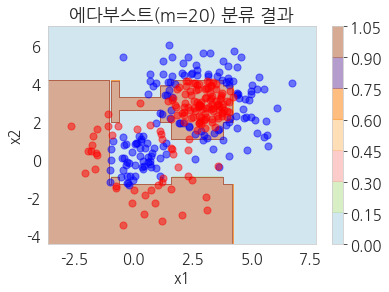

In [12]:
def plot_result(model, title="분류결과", legend=False, s=50):
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.02), np.arange(x2_min, x2_max, 0.02))
    Y = model.predict(np.c_[xx1.ravel(), xx2.ravel()]).reshape(xx1.shape)
    cs = plt.contourf(xx1, xx2, Y, cmap=plt.cm.Paired, alpha=0.5)
    for i, n, c in zip(range(2), "01", "br"):
        idx = np.where(y==i)  # y=0, 1 index 찾기
        plt.scatter(X[y==i, 0], X[y==i, 1], c=c, s=s, alpha=0.5, label="Class %s" % n)
    plt.xlim(x1_min, x1_max)
    plt.ylim(x2_min, x2_max)
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title(title)
    plt.colorbar(cs)
    if legend:
        plt.legend()
    plt.grid(False)
    
plot_result(model_ada, "에다부스트(m=20) 분류 결과")

각 단계의 분류 모형에 대한 가중치 값과 분류 모형의 분류 결과를 시각화하면 다음과 같다. 데이터의 가중치는 스캐터플롯의 점의 크기로 표현하였다. 단계가 진행될 수록 가중치값의 변화가 커지는 것을 볼 수 있다.

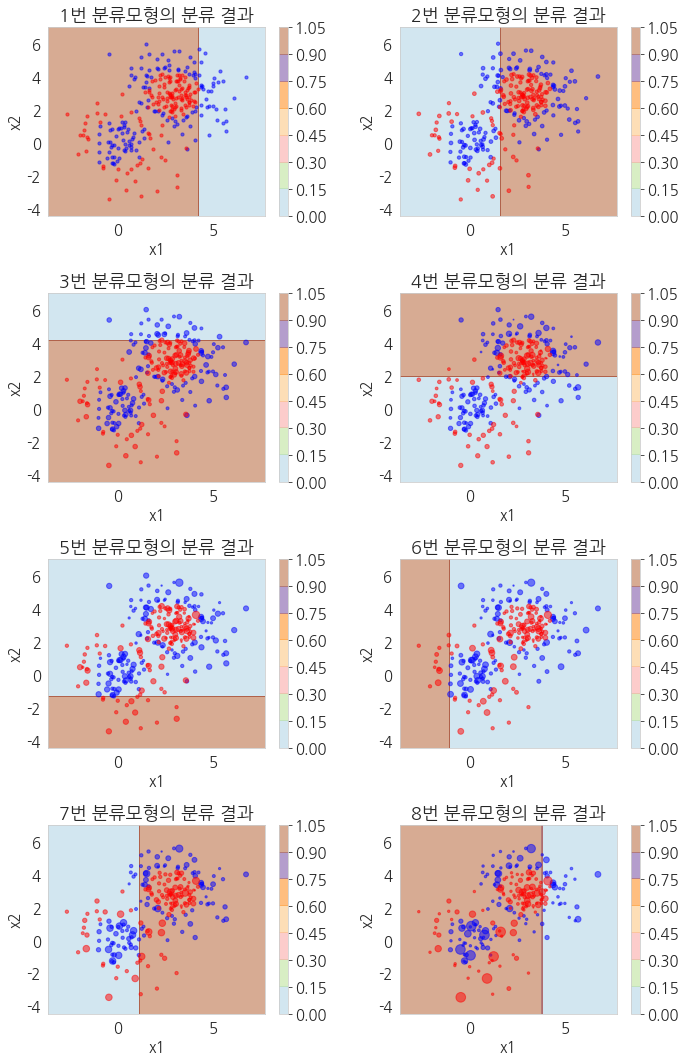

In [19]:
plt.figure(figsize=(10, 15))
plt.subplot(421)
plot_result(model_ada.estimators_[0], "1번 분류모형의 분류 결과", s=10)
plt.subplot(422)
plot_result(model_ada.estimators_[1], "2번 분류모형의 분류 결과", s=(4000 * model_ada.sample_weight[0]).astype(int))
plt.subplot(423)
plot_result(model_ada.estimators_[2], "3번 분류모형의 분류 결과", s=(4000 * model_ada.sample_weight[1]).astype(int))
plt.subplot(424)
plot_result(model_ada.estimators_[3], "4번 분류모형의 분류 결과", s=(4000 * model_ada.sample_weight[2]).astype(int))
plt.subplot(425)
plot_result(model_ada.estimators_[4], "5번 분류모형의 분류 결과", s=(4000 * model_ada.sample_weight[3]).astype(int))
plt.subplot(426)
plot_result(model_ada.estimators_[5], "6번 분류모형의 분류 결과", s=(4000 * model_ada.sample_weight[4]).astype(int))
plt.subplot(427)
plot_result(model_ada.estimators_[6], "7번 분류모형의 분류 결과", s=(4000 * model_ada.sample_weight[5]).astype(int))
plt.subplot(428)
plot_result(model_ada.estimators_[7], "8번 분류모형의 분류 결과", s=(4000 * model_ada.sample_weight[6]).astype(int))
plt.tight_layout()

## 그레디언트 부스트

그레이던트 부스트 모형은 변분법(calculus of variations)을 사용한 모형이다.

함수  𝑓(𝑥) 를 최소화하는  𝑥 는 다음과 같이 gradient descent 방법으로 찾을 수 있다.

$$x_{m} = x_{m-1} - \alpha_m \dfrac{df}{dx}$$

그레디언트 부스트 모형에서는 손실 범함수(loss functional)  𝐿(𝑦,𝐶𝑚−1) 을 최소화하는 개별 분류함수  𝑘𝑚 를 찾는다. 이론적으로 가장 최적의 함수는 범함수의 미분이다.

$$C_{m} = C_{m-1} - \alpha_m \dfrac{\delta L(y, C_{m-1})}{\delta C_{m-1}} = C_{m-1} + \alpha_m k_m$$

따라서 그레디언트 부스트 모형은 분류/회귀 문제에 상관없이 개별 멤버 모형으로 회귀분석 모형을 사용한다. 가장 많이 사용되는 회귀분석 모형은 의사결정 회귀나무(decision tree regression model) 모형이다.

그레디언트 부스트 모형에서는 다음과 같은 과정을 반복하여 멤버와 그 가중치를 계산한다.

(1) − 𝛿𝐿(𝑦,𝐶𝑚) / 𝛿𝐶𝑚  를 목표값으로 개별 멤버 모형  𝑘𝑚  을 찾는다.

(2) (𝑦−(𝐶𝑚−1+𝛼𝑚𝑘𝑚))2  를 최소화하는 스텝사이즈  𝛼𝑚  을 찾는다.

(3) 𝐶𝑚=𝐶𝑚−1+𝛼𝑚𝑘𝑚  최종 모형을 갱신한다.

만약 손실 범함수가 오차 제곱 형태라면

$$L(y, C_{m-1}) = \dfrac{1}{2}(y - C_{m-1})^2$$


범함수의 미분은 실제 목표값  𝑦 와  𝐶𝑚−1 과의 차이 즉, 잔차(residual)가 된다.

$$-\dfrac{dL(y, C_m)}{dC_m} = y - C_{m-1}$$

In [20]:
from sklearn.ensemble import GradientBoostingClassifier

model_grad = GradientBoostingClassifier(n_estimators=100, max_depth=2, random_state=0)

In [21]:
%%time
model_grad.fit(X, y)

CPU times: user 49.5 ms, sys: 3.26 ms, total: 52.7 ms
Wall time: 55.7 ms


GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=2,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

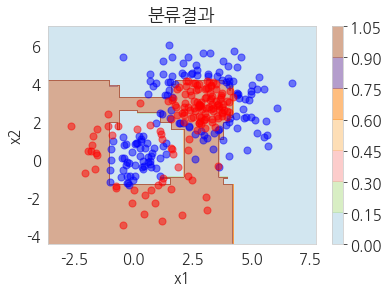

In [22]:
plot_result(model_grad)

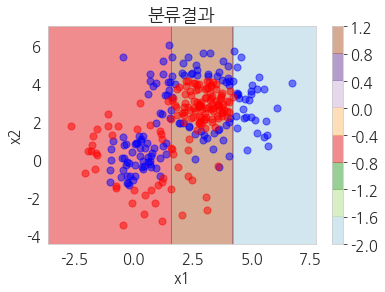

In [23]:
plot_result(model_grad.estimators_[0][0])

In [25]:
model_grad.estimators_.shape

(100, 1)

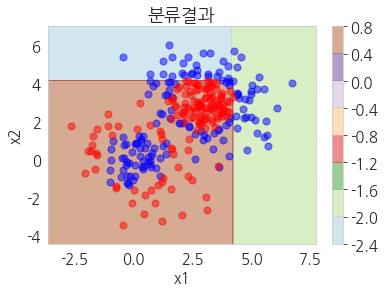

In [26]:
plot_result(model_grad.estimators_[1][0])

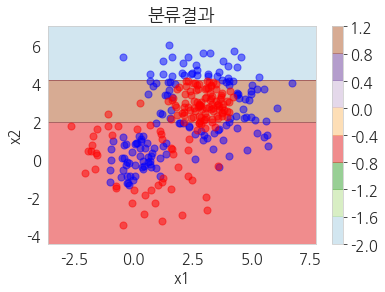

In [27]:
plot_result(model_grad.estimators_[2][0])

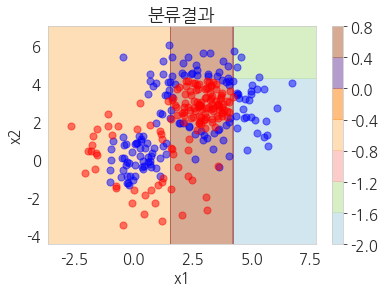

In [28]:
plot_result(model_grad.estimators_[3][0])

## XGBoost 라이브러리

In [ ]:
import xg